In [1]:
import os, sys
sys.path.append( os.path.join('..', '..'))

import numpy as np
from scipy.constants import e, k, epsilon_0

# my own modules
from src.solver import Poisson_solver1D as solver1D
from src.solver import updater
from src.model.carrier_density import *

# Simple Case

A pure Si PN junction with low doping ($N_a, N_d = 10^{16}$) </br>
Na : acceptor doping density </br>
Nd : donor doping density </br>
Ec : conduction band edge </br>
Ev : valence band edge </br>
Ef : Fermi level  </br>
n  : electron (carrier) density </br>
p  : hole (carrier) density </br>
Field : electric field </br>
V  : voltage </br>

In [2]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 

x = np.linspace(-1e-4, 1e-4, 1000) # cm
Na = dope_constant_acceptor(x = x, Nd = 1e16, x_range=[-np.inf,0]) # cm^-3
Nd = dope_constant_donor(x = x, Na = 1e16, x_range=[0,np.inf]) # cm^-3
epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=['Si',], x_range=[[-np.inf, np.inf],]) / e 

In [3]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return to_poisson_source(charge_density = cal_total_charge_density(x, V), epsilon=epsilon_q)
def d_src_dV_fun(x, V):
    return to_poisson_source(charge_density = cal_dtotal_charge_density_dV(x, V), epsilon=epsilon_q)  


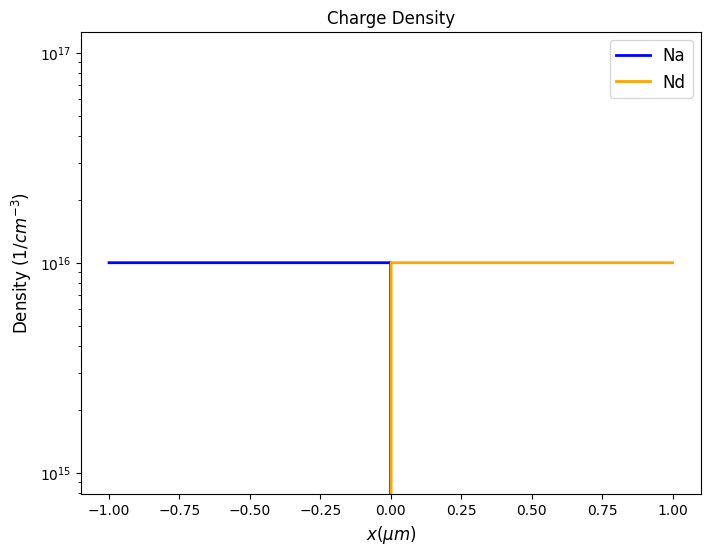

In [4]:
""" plot doping """
solver1D.plot_carrier_density_1D(x, Na = Na, Nd = Nd);

In [5]:
""" solve Poisson equation """
V_updater = updater.AdagradUpdater(size = x.size, lr=0.1)
V, V_history = solver1D.solve_Poisson_1D(x = x, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, max_iter=2000, record=True)

  0%|          | 0/2000 [00:00<?, ?it/s]

 41%|████      | 818/2000 [00:02<00:02, 403.87it/s]


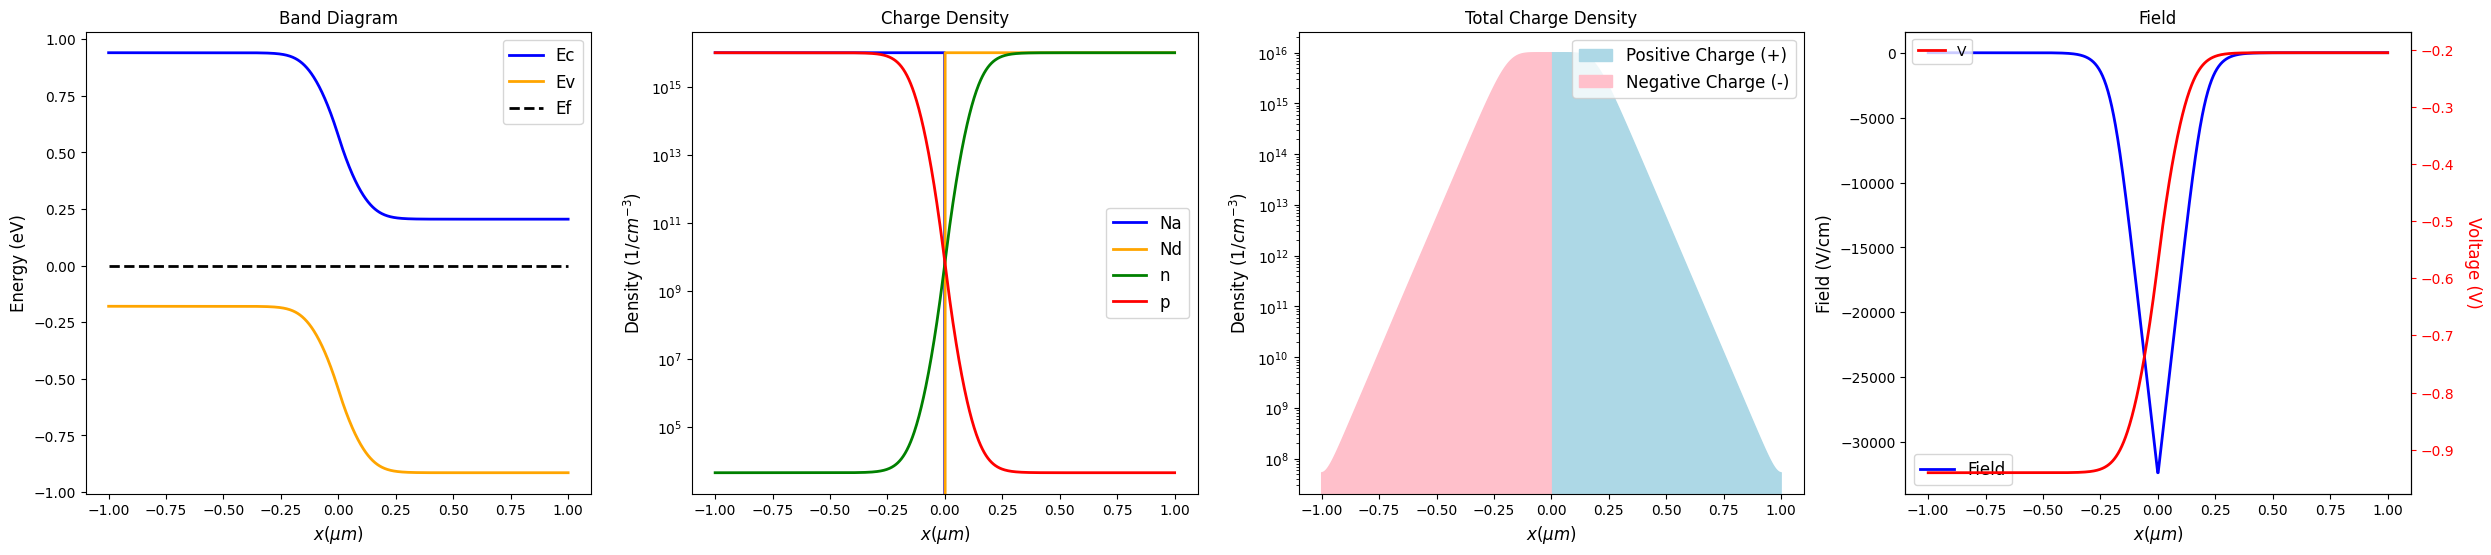

In [6]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = cal_electric_field(x, V)

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

In N type bulk region, Ef is close to Ec, causing high electron density. The electron density would be close to the donor nucleus density. Then, the sum of the electron charge (-) and the donor nucleus charge (+) would close to zero. This is similar to P type bulk region. The flat and zero total charge density would lead to zero electric field and flat voltage. </br>
In constrast, in the depletion region, the band gradually increases from the N type to P type region. In the N type depletion region, becasue the Ec is gradually far away from Ef, the electron density would decreasing and thus total charge would become positive (donor nucleus). In the P type depletion region, the hole density is also decreasing, leading negative total charge accumulation in the interface. Therefore, the non-zero charge density in the interface would causing an electric pointing from N type region (+) to P type region and a sharp voltage drop in depletion region. </br>
Don't forget that the voltage is negative to band diagram. (V = -q*Ec). The change of voltage is also the change of the band structure. </br>It is a self-consistent theory. The charge distribution would lead to electric field difference, and the electric field difference would cause the change of volatge and band structure. These two mechanism should both be achieved and that is self-consistent.

# PN+ junction
A pure Si PN junction with low acceptor doping but with high donor doping to simulate the junction between source/drain and body in MOSFET </br>
Na : acceptor doping density </br>
Nd : donor doping density </br>
Ec : conduction band edge </br>
Ev : valence band edge </br>
Ef : Fermi level  </br>
n  : electron (carrier) density </br>
p  : hole (carrier) density </br>
Field : electric field </br>
V  : voltage </br>

In [7]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 

x = np.linspace(-1e-4, 1e-4, 1000) # cm
Na = dope_constant_acceptor(x = x, Nd = 1e16, x_range=[-np.inf,0]) # cm^-3
Nd = dope_constant_donor(x = x, Na = 1e18, x_range=[0,np.inf]) # cm^-3
epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=['Si',], x_range=[[-np.inf, np.inf],]) / e 

In [8]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return to_poisson_source(charge_density = cal_total_charge_density(x, V), epsilon=epsilon_q)
def d_src_dV_fun(x, V):
    return to_poisson_source(charge_density = cal_dtotal_charge_density_dV(x, V), epsilon=epsilon_q)  

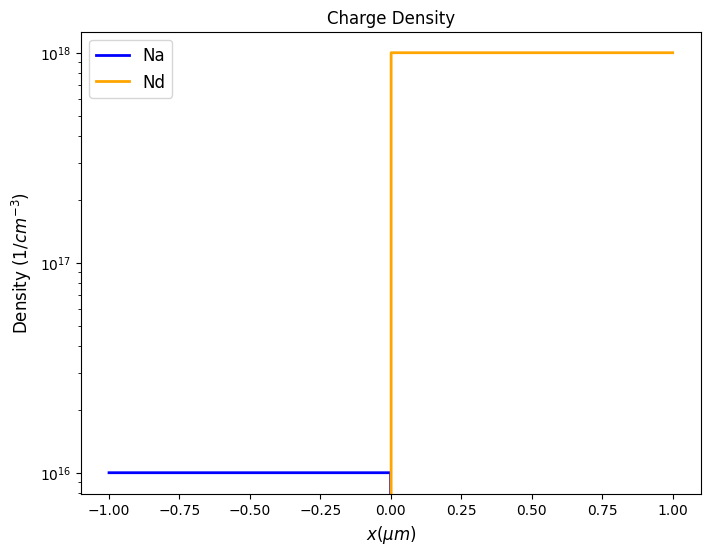

In [9]:
""" plot doping """
solver1D.plot_carrier_density_1D(x, Na = Na, Nd = Nd);

In [10]:
""" solve Poisson equation """
V_updater = updater.AdagradUpdater(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater)

 59%|█████▉    | 594/1000 [00:01<00:00, 461.57it/s]


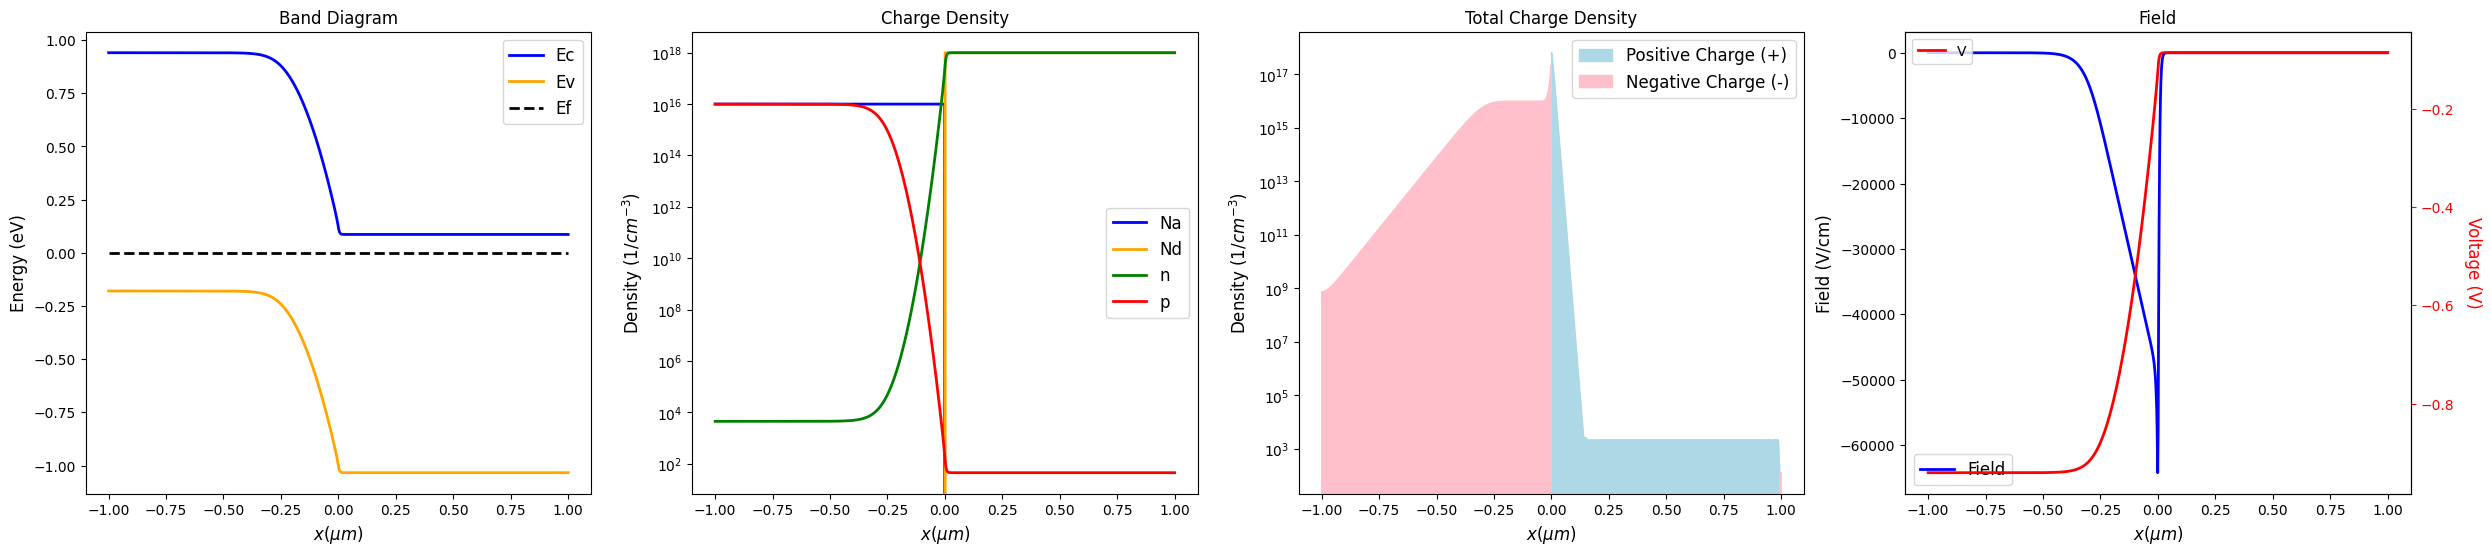

In [11]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = cal_electric_field(x, V)

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

Different from low doping PN junction, PN+ junction has much thinner depletion region in N-type semicondictor (right hand side). Because of high electron density, N-type region can just use thinner region to compensate the hole in the P type region, leading to such thin deleption region. However, this would cause larger electric field in the N-type region interface.

# PIN junction
A Si PIN junction with low doping ($10^{16}$) and insert a no doping (intrinsic) region between p- and n-type semiconductor to simulate the solar cell case.  </br>
Na : acceptor doping density </br>
Nd : donor doping density </br>
Ec : conduction band edge </br>
Ev : valence band edge </br>
Ef : Fermi level  </br>
n  : electron (carrier) density </br>
p  : hole (carrier) density </br>
Field : electric field </br>
V  : voltage </br>

In [12]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 

x = np.linspace(-1e-4, 1e-4, 1000) # cm
L = 0.1e-4
Na = dope_constant_acceptor(x = x, Nd = 1e16, x_range=[-np.inf,-L]) # cm^-3
Nd = dope_constant_donor(x = x, Na = 1e16, x_range=[L, np.inf]) # cm^-3
epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=['Si',], x_range=[[-np.inf, np.inf],]) / e 

In [13]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return to_poisson_source(charge_density = cal_total_charge_density(x, V), epsilon=epsilon_q)
def d_src_dV_fun(x, V):
    return to_poisson_source(charge_density = cal_dtotal_charge_density_dV(x, V), epsilon=epsilon_q)  


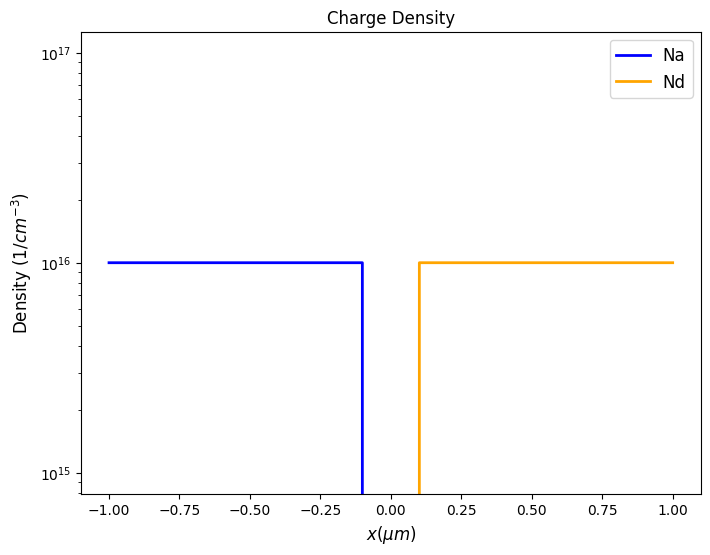

In [14]:
""" plot doping """
solver1D.plot_carrier_density_1D(x, Na = Na, Nd = Nd);

In [15]:
""" solve Poisson equation """
V_updater = updater.AdagradUpdater(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, tol=1e-10, max_iter=2000)

 69%|██████▉   | 1375/2000 [00:03<00:01, 419.24it/s]


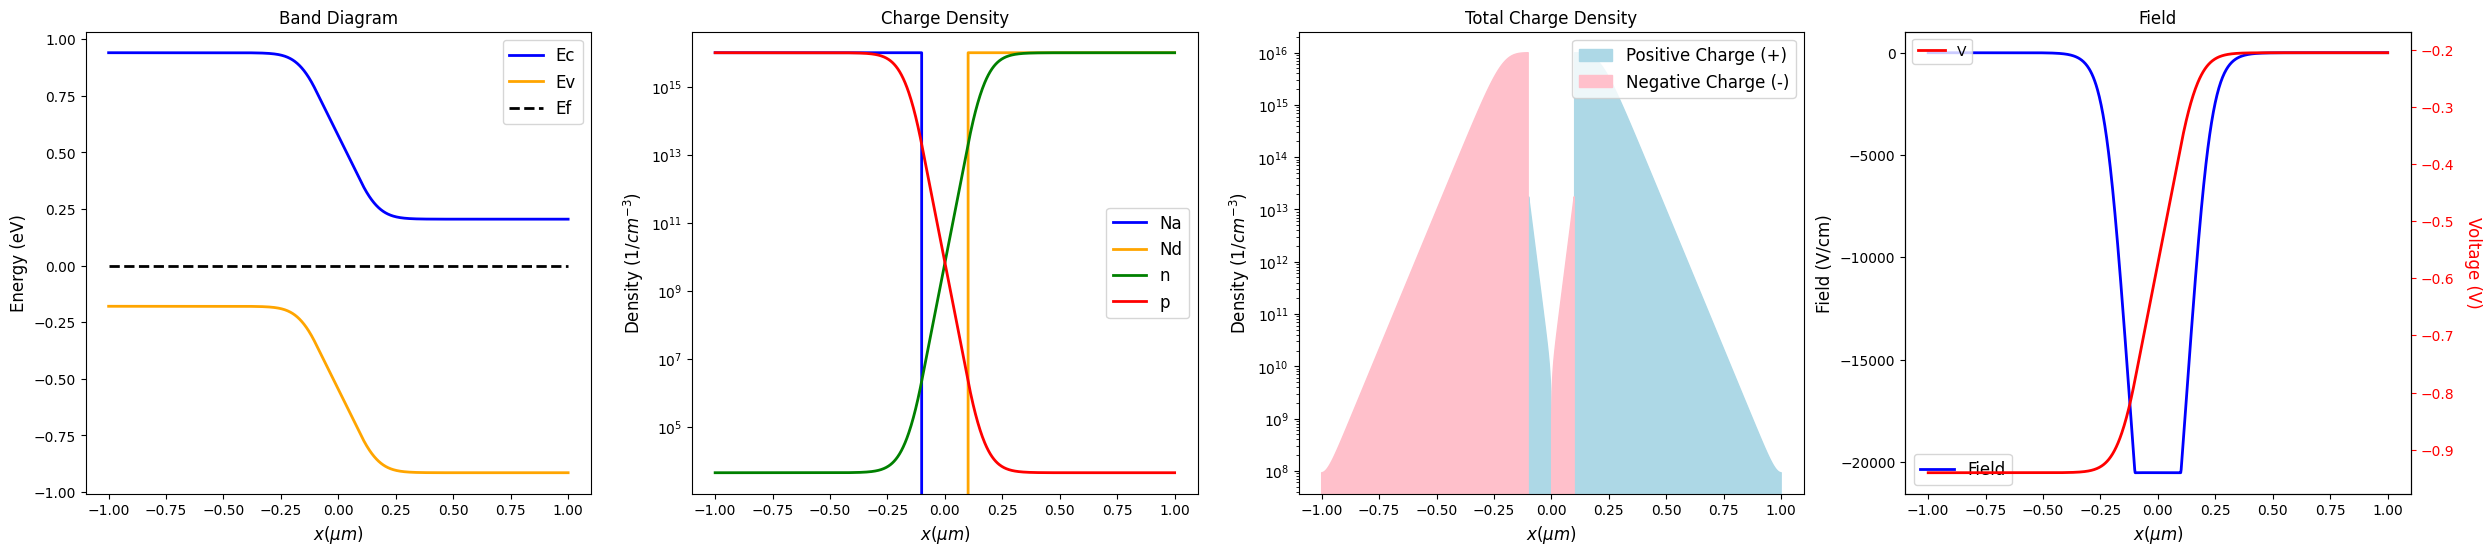

In [16]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = cal_electric_field(x, V)

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

Although the band diagram is similar to simple pn junction, it is obvious that the carrier density in the intrinsic region is very low. The charges accumulate in the interface in P and N semiconductor region. These lead to a constant electric field. The constant electric field is similar to a capacitor that the charges accumulate in the plates and no charges between the plates. Besides, in solar cell, these low carrier region can extend the lifetime of an exciton to prevent re-combination and the constant electric field can separate the electron and the hole toward different direction, causing a current.

# PNN+ junction
A Si PNN+ junction with low doping P type semiconductor and high doping N type semiconductor. Between P and N+, insert a gradient increasing N type semiconductor.  </br>
Na : acceptor doping density </br>
Nd : donor doping density </br>
Ec : conduction band edge </br>
Ev : valence band edge </br>
Ef : Fermi level  </br>
n  : electron (carrier) density </br>
p  : hole (carrier) density </br>
Field : electric field </br>
V  : voltage </br>

In [17]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 

Nd1_value = 1e18 # cm^-3
Nd2_value = 1e16 # cm^-3

x = np.linspace(-2e-4, 2e-4, 1000) # cm
Na = dope_constant_acceptor(x = x, Nd = 1e16, x_range=[-np.inf,0]) # cm^-3
Nd = dope_constant_donor(   x = x, Na = Nd1_value, x_range=[0,np.inf]) # cm^-3
mask = np.bitwise_and( x>0, x<0.3e-4)
Nd[mask] = np.exp( np.log(Nd2_value) + ( np.log(Nd1_value) - np.log(Nd2_value)) * x[mask] / 0.3e-4 )

epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=['Si',], x_range=[[-np.inf, np.inf],]) / e 

In [18]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return to_poisson_source(charge_density = cal_total_charge_density(x, V), epsilon=epsilon_q)
def d_src_dV_fun(x, V):
    return to_poisson_source(charge_density = cal_dtotal_charge_density_dV(x, V), epsilon=epsilon_q)  


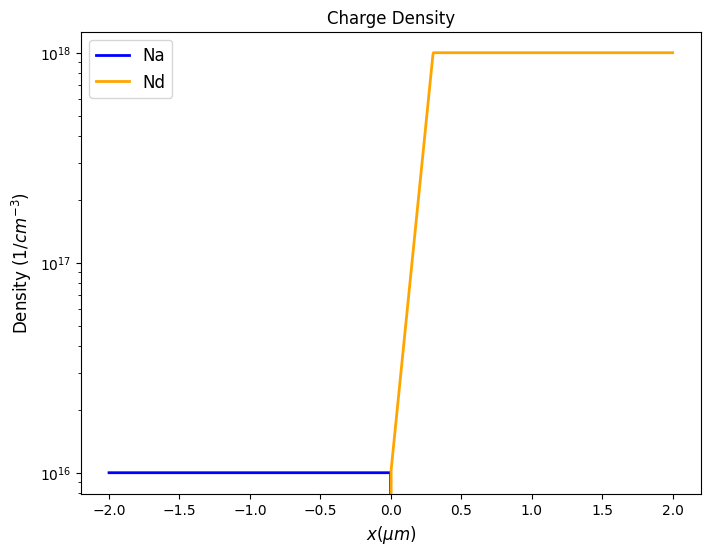

In [19]:
""" plot doping """
solver1D.plot_carrier_density_1D(x, Na = Na, Nd = Nd);

In [20]:
""" solve Poisson equation """
V_updater = updater.AdagradUpdater(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, max_iter=4000)

 65%|██████▌   | 2614/4000 [00:06<00:03, 433.68it/s]


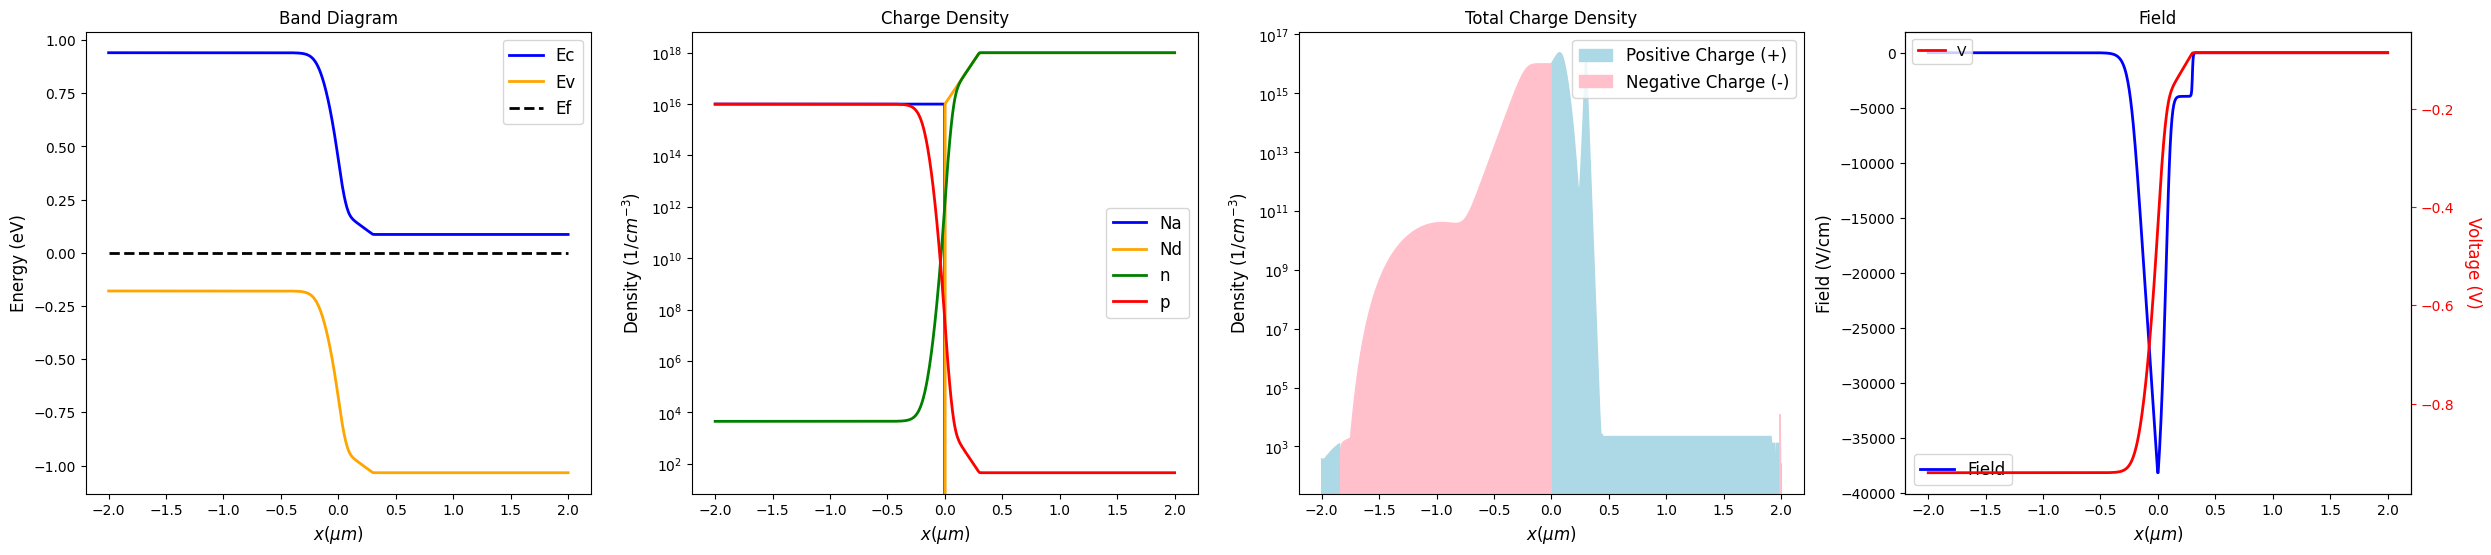

In [21]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = cal_electric_field(x, V)

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

Different from a simple PN+ junction, an additional low doping N-type region can effectively reduce the electric field in the interface, comparing to PN+ junction. The lower electric field can effectively reduce the electron velocity. The relative low electron velocity can also reduce the electron and nucleus collision, which can enhance the device lifetime. This technique is well known as LDD (lightly doped drain) in MOSFET.